# Plot MIMO OFDM Communication simulations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import json

from cissir.utils import plot_path, res_path
from cissir import visualization as viz
viz.paper_style()


In [2]:
fname = "bler_analog"
with open(res_path/f"{fname}.json", 'r', encoding ='utf8') as json_file:
    DL_SIMS = json.load(json_file)

Simulation duration: 0.58 [h]


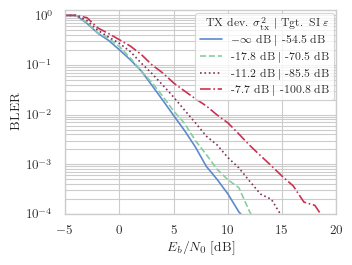

In [3]:
print("Simulation duration: {:1.2f} [h]".format(DL_SIMS["duration"]/3600))

tx_devs = DL_SIMS["codebook_dev"]
cb_si = DL_SIMS["codebook_si"]

fig, ax = plt.subplots()

ax.set_xlabel(r"$E_b/N_0$ [dB]")
ax.set_ylabel("BLER")
ax.grid(which="both")

bit_per_symbol = 2 

legend = [r"$-\infty$ dB $|$ " + f"{cb_si[0]:.1f} dB",
          f"{tx_devs[1]:.1f} dB $|$ " + f"{cb_si[1]:.1f} dB",
          f"{tx_devs[2]:.1f} dB $|$ " + f"{cb_si[2]:.1f} dB",
          f"{tx_devs[3]:.1f} dB $|$ " + f"{cb_si[3]:.1f} dB",]

xmin = min(DL_SIMS["ebno_db"])
xmax = 20
ymin = 1e-4
ymax = 1.3

for i, ber in enumerate(DL_SIMS["bler"]):
    ax.semilogy(DL_SIMS["ebno_db"], ber)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

fontsize = 8.0
ax.legend(legend, title=r"TX dev. $\sigma_{\mathrm{tx}}^2$ $|$ Tgt. SI $\varepsilon$",
          borderaxespad=0.25, title_fontsize=fontsize, fontsize=fontsize,
          alignment="right")
ax.grid()

plt.savefig(plot_path/f"{fname}.pgf", bbox_inches="tight")
plt.savefig(plot_path/f"{fname}.pdf", bbox_inches="tight")